In [6]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Reset to the default display settings
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

In [1]:
import os
from pathlib import Path
from dotenv import load_dotenv

cwd = Path.cwd()
# Load dotenv into sys PATH
dotenv_file = cwd / "../../example/.env"
assert dotenv_file.is_file()
load_dotenv(dotenv_file)

True

In [2]:
import pandas as pd
csv_file = r"..\tmp\file_w_caffeine.csv"
coff_dl_df = pd.read_csv(csv_file)

In [7]:
df_w_caff = coff_dl_df.copy()

df_w_caff


specimen_id  longitude   latitude  caffeine_percent
0        C_perrieri_A12  46.333889 -24.560833             0.000
1        C_perrieri_A12  46.333889 -24.560833             0.000
2        C_perrieri_A12  46.333889 -24.560833             0.000
3    C_humbertii_RNF785  43.610638 -23.078725             0.000
4        C_perrieri_A12  45.993359 -17.044592             0.000
5        C_perrieri_A12  44.272222 -22.853611             0.000
6        C_perrieri_A12  46.015711 -17.117819             0.000
7        C_perrieri_A12  46.015693 -17.117573             0.000
8    C_pervilleana_A957  45.920397 -17.077081             0.000
9    C_pervilleana_A957  45.923007 -17.078820             0.000
10   C_humbertii_RNF785  44.136600 -23.531800             0.000
11   C_humbertii_RNF785  44.136600 -23.531800             0.000
12       C_perrieri_A12  44.272222 -22.853611             0.000
13       C_perrieri_A12  44.272222 -22.853611             0.000
14       C_perrieri_A12  44.263056 -22.845833             0.000
15        C_leroyi_A315  50.074722 -14.186667             0.020
16        C_resinosa_A8  49.405833 -17.688889             0.000
17     C_richardii_A575  50.016389 -14.101111             0.030
18     C_richardii_A575  49.459444 -17.705556             0.030
19       C_perrieri_A12  44.272222 -22.853611             0.000
20       C_perrieri_A12  44.263056 -22.845833             0.000
21       C_perrieri_A12  46.145833 -24.303611             0.000
22       C_perrieri_A12  45.365556 -21.188611             0.000
23       C_perrieri_A12  44.263056 -22.845833             0.000
24       C_perrieri_A12  46.145833 -24.303611             0.000
25     C_richardii_A575  49.459444 -17.705556             0.030
26        C_leroyi_A315  50.074722 -14.186667             0.020
27        C_resinosa_A8  49.405833 -17.688889             0.000
28     C_richardii_A575  50.016389 -14.101111             0.030
29  C_mauritiana_Makes4  55.417000 -20.915000             0.035
30       C_perrieri_A12  46.145833 -24.303611             0.000
31       C_perrieri_A12  45.365556 -21.188611             0.000
32        C_leroyi_A315  50.074722 -14.186667             0.020
33       C_perrieri_A12  45.989986 -17.052635             0.000
34       C_perrieri_A12  45.985053 -17.067958             0.000
35  C_mauritiana_Makes4  55.517160 -21.292310             0.035
36  C_mauritiana_Makes4  55.517870 -21.290070             0.035
37  C_mauritiana_Makes4  55.471910 -21.146840             0.035
38  C_mauritiana_Makes4  55.471530 -21.146860             0.035
39  C_mauritiana_Makes4  55.472790 -21.148790             0.035
40    C_tsirananae_A515  49.371244 -12.226533             0.000
41        C_heimii_A516  49.263119 -12.279828             0.000
42       C_perrieri_A12  45.989000 -17.062690             0.000
43        C_heimii_A516  49.347115 -12.210881             0.000
44    C_tsirananae_A515  49.251716 -12.382886             0.000
45    C_tsirananae_A515  49.266346 -12.314212             0.000
46    C_tsirananae_A515  49.355849 -12.251702             0.000
47        C_heimii_A516  49.303872 -12.318289             0.000
48    C_tsirananae_A515  49.281018 -12.403209             0.000
49        C_heimii_A516  49.226443 -12.281807             0.000
50    C_tsirananae_A515  49.297935 -12.305870             0.000
51    C_tsirananae_A515  49.219958 -12.507370             0.000
52        C_resinosa_A8  49.405833 -17.688889             0.000
53       C_perrieri_A12  47.781762 -14.795310             0.000
54     C_richardii_A575  50.016389 -14.101111             0.030
55    C_tsirananae_A515  49.340235 -12.302029             0.000
56    C_tsirananae_A515  49.322727 -12.338667             0.000
57        C_heimii_A516  49.342500 -12.396327             0.000
58        C_heimii_A516  49.275700 -12.398991             0.000
59    C_tsirananae_A515  49.322106 -12.239535             0.000
60        C_heimii_A516  49.569592 -12.454103             0.000
61        C_heimii_A516  49.549809 -12.58046

In [5]:

unique_values = df_w_caff['specimen_id'].unique()

# Print or work with the unique values
print(unique_values)


['C_perrieri_A12' 'C_humbertii_RNF785' 'C_pervilleana_A957'
 'C_leroyi_A315' 'C_resinosa_A8' 'C_richardii_A575' 'C_mauritiana_Makes4'
 'C_tsirananae_A515' 'C_heimii_A516']


#MadaclimCollection points must have unique specimen_id

Creation of a Collection per species for visualisation

In [8]:
def extract_rows_containing_word(df, word):
    filtered_df = df[df.apply(lambda row: row.astype(str).str.contains(word, case=False).any(), axis=1)]
    return filtered_df

In [9]:

unique_values



array(['C_perrieri_A12', 'C_humbertii_RNF785', 'C_pervilleana_A957',
       'C_leroyi_A315', 'C_resinosa_A8', 'C_richardii_A575',
       'C_mauritiana_Makes4', 'C_tsirananae_A515', 'C_heimii_A516'],
      dtype=object)

In [11]:
heimii_df = extract_rows_containing_word(df_w_caff, "heimii")
humbertii_df = extract_rows_containing_word(df_w_caff, "humbertii")
perrieri_df = extract_rows_containing_word(df_w_caff, "perrieri")
pervilleana_df = extract_rows_containing_word(df_w_caff, "pervilleana")
tsirananae_df = extract_rows_containing_word(df_w_caff, "tsirananae")
leroyi_df = extract_rows_containing_word(df_w_caff, "leroyi")
resinosa_df = extract_rows_containing_word(df_w_caff,"resinosa")
richardii_df = extract_rows_containing_word(df_w_caff,"richardii")
mauritiana_df = extract_rows_containing_word(df_w_caff,"mauritiana")


print(heimii_df.shape)
print(humbertii_df.shape)
print(perrieri_df.shape)
print(pervilleana_df.shape)
print(tsirananae_df.shape)
print(leroyi_df.shape)
print(resinosa_df.shape)
print(richardii_df.shape)
print(mauritiana_df.shape)


(8, 4)
(3, 4)
(22, 4)
(2, 4)
(10, 4)
(3, 4)
(3, 4)


In [17]:
heimii_df = extract_rows_containing_word(df_w_caff, "heimii")

In [18]:
heimii_df.loc[:,'specimen_id'] = heimii_df['specimen_id'] + '_' + heimii_df.index.astype(str)

heimii_df

specimen_id  longitude   latitude  caffeine_percent
41  C_heimii_A516_41  49.263119 -12.279828               0.0
43  C_heimii_A516_43  49.347115 -12.210881               0.0
47  C_heimii_A516_47  49.303872 -12.318289               0.0
49  C_heimii_A516_49  49.226443 -12.281807               0.0
57  C_heimii_A516_57  49.342500 -12.396327               0.0
58  C_heimii_A516_58  49.275700 -12.398991               0.0
60  C_heimii_A516_60  49.569592 -12.454103               0.0
61  C_heimii_A516_61  49.549809 -12.580463               0.0

In [21]:
import pandas as pd

def append_index_to_column(df, column_name):
    """
    Appends the index to each value in a specified column of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    column_name (str): The name of the column where values should be modified.
    
    Returns:
    pd.DataFrame: A new DataFrame with modified values in the specified column.
    """
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    # Modify the specified column by appending the index to each value
    df.loc[:, column_name] = df[column_name] + '_' + df.index.astype(str)
    
    return df


In [22]:
humbertii_df = append_index_to_column(humbertii_df,'specimen_id')
perrieri_df = append_index_to_column(perrieri_df,'specimen_id')
pervilleana_df = append_index_to_column(pervilleana_df,'specimen_id')
tsirananae_df = append_index_to_column(tsirananae_df,'specimen_id')
leroyi_df = append_index_to_column(leroyi_df,'specimen_id')
resinosa_df = append_index_to_column(resinosa_df,'specimen_id')
richardii_df = append_index_to_column(richardii_df,'specimen_id')
mauritiana_df = append_index_to_column(mauritiana_df,'specimen_id')



In [12]:
from py_madaclim.raster_manipulation import MadaclimCollection

C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1030: SyntaxWarning: invalid escape sequence '\d'
  start = int(re.search("\d+", row[col_to_split].split("-")[0]).group())


In [19]:
coll_heimii = MadaclimCollection.populate_from_df(heimii_df)

Warning! No source_crs column in the df. Using the default value of EPSG:4326...
Creating MadaclimPoint(specimen_id=C_heimii_A516_41...)
Creating MadaclimPoint(specimen_id=C_heimii_A516_43...)
Creating MadaclimPoint(specimen_id=C_heimii_A516_47...)
Creating MadaclimPoint(specimen_id=C_heimii_A516_49...)
Creating MadaclimPoint(specimen_id=C_heimii_A516_57...)
Creating MadaclimPoint(specimen_id=C_heimii_A516_58...)
Creating MadaclimPoint(specimen_id=C_heimii_A516_60...)
Creating MadaclimPoint(specimen_id=C_heimii_A516_61...)
Created new MadaclimCollection with 8 samples.


In [24]:
coll_humbertii = MadaclimCollection.populate_from_df(humbertii_df)
coll_perrieri = MadaclimCollection.populate_from_df(perrieri_df)
coll_pervilleana = MadaclimCollection.populate_from_df(pervilleana_df)
coll_tsirananae = MadaclimCollection.populate_from_df(tsirananae_df)
coll_resinosa = MadaclimCollection.populate_from_df(resinosa_df)
coll_leroyi = MadaclimCollection.populate_from_df(leroyi_df)
coll_richardii = MadaclimCollection.populate_from_df(richardii_df)
#coll_mauritiana = MadaclimCollection.populate_from_df(mauritiana_df) ##out of bounds of Madagascar

Warning! No source_crs column in the df. Using the default value of EPSG:4326...
Creating MadaclimPoint(specimen_id=C_humbertii_RNF785_3...)
Creating MadaclimPoint(specimen_id=C_humbertii_RNF785_10...)
Creating MadaclimPoint(specimen_id=C_humbertii_RNF785_11...)
Created new MadaclimCollection with 3 samples.
Warning! No source_crs column in the df. Using the default value of EPSG:4326...
Creating MadaclimPoint(specimen_id=C_perrieri_A12_0...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_1...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_2...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_4...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_5...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_6...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_7...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_12...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_13...)
Creating MadaclimPoint(specimen_id=C_perrieri_A12_14...)
Creating MadaclimPoint(specimen_id=C_perrieri_

In [25]:
coll_heimii.all_points[0]

MadaclimPoint(
	specimen_id = C_heimii_A516_41,
	source_crs = 4326,
	longitude = 49.263119,
	latitude = -12.279828,
	mada_geom_point = POINT (963987.2160799548 8638826.905155072),
	sampled_layers = None (Not sampled yet),
	nodata_layers = None (Not sampled yet),
	is_categorical_encoded = False,
	caffeine_percent = 0.0,
	gdf.shape = (1, 9)
)

Access the Geopandas dataframe attribute `gdf` based on the `mada_geom_point` geometry of each object

In [26]:
coll_heimii.gdf

specimen_id  source_crs  longitude   latitude  \
0  C_heimii_A516_41        4326  49.263119 -12.279828   
1  C_heimii_A516_43        4326  49.347115 -12.210881   
2  C_heimii_A516_47        4326  49.303872 -12.318289   
3  C_heimii_A516_49        4326  49.226443 -12.281807   
4  C_heimii_A516_57        4326  49.342500 -12.396327   
5  C_heimii_A516_58        4326  49.275700 -12.398991   
6  C_heimii_A516_60        4326  49.569592 -12.454103   
7  C_heimii_A516_61        4326  49.549809 -12.580463   

                  mada_geom_point sampled_layers nodata_layers  \
0  POINT (963987.216 8638826.905)           None          None   
1  POINT (973268.317 8646324.577)           None          None   
2  POINT (968361.925 8634492.084)           None          None   
3  POINT (959985.375 8638670.641)           None          None   
4  POINT (972432.287 8625771.942)           None          None   
5  POINT (965147.750 8625594.362)           None          None   
6  POINT (997074.808 8618950.269)           None          None   
7  POINT (994676.992 8604973.911)           None          None   

   is_categorical_encoded  caffeine_percent  
0                   False               0.0  
1                   False               0.0  
2                   False               0.0  
3                   False               0.0  
4                   False               0.0  
5                   False               0.0  
6                   False               0.0  
7                   False               0.0

### Sample from rasters

Just like the `MadaclimPoint` class, use the `sample_from_rasters` method to get data based on the collection's specimens.

In [27]:
from py_madaclim.info import MadaclimLayers
mada_info = MadaclimLayers()

C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bioclim_feats = pd.read_json(self._clim_metadata["table_1"])
C:\Users\adm1\OneDrive - 

In [28]:
print(mada_info.all_layers.shape)
mada_info.all_layers

(79, 6)


geoclim_type  layer_number layer_name  \
0          clim             1      tmin1   
1          clim             2      tmin2   
2          clim             3      tmin3   
3          clim             4      tmin4   
4          clim             5      tmin5   
5          clim             6      tmin6   
6          clim             7      tmin7   
7          clim             8      tmin8   
8          clim             9      tmin9   
9          clim            10     tmin10   
10         clim            11     tmin11   
11         clim            12     tmin12   
12         clim            13      tmax1   
13         clim            14      tmax2   
14         clim            15      tmax3   
15         clim            16      tmax4   
16         clim            17      tmax5   
17         clim            18      tmax6   
18         clim            19      tmax7   
19         clim            20      tmax8   
20         clim            21      tmax9   
21         clim            22     tmax10   
22         clim            23     tmax11   
23         clim            24     tmax12   
24         clim            25      prec1   
25         clim            26      prec2   
26         clim            27      prec3   
27         clim            28      prec4   
28         clim            29      prec5   
29         clim            30      prec6   
30         clim            31      prec7   
31         clim            32      prec8   
32         clim            33      prec9   
33         clim            34     prec10   
34         clim            35     prec11   
35         clim            36     prec12   
36         clim            37       bio1   
37         clim            38       bio2   
38         clim            39       bio3   
39         clim            40       bio4   
40         clim            41       bio5   
41         clim            42       bio6   
42         clim            43       bio7   
43         clim            44       bio8   
44         clim            45       bio9   
45         clim            46      bio10   
46         clim            47      bio11   
47         clim            48      bio12   
48         clim            49      bio13   
49         clim            50      bio14   
50         clim            51      bio15   
51         clim            52      bio16   
52         clim            53      bio17   
53         clim            54      bio18   
54         clim            55      bio19   
55         clim            56       pet1   
56         clim            57       pet2   
57         clim            58       pet3   
58         clim            59       pet4   
59         clim            60       pet5   
60         clim            61       pet6   
61         clim            62       pet7   
62         clim            63       pet8   
63         clim            64       pet9   
64         clim            65      pet10   
65         clim            66      pet11   
66         clim            67      pet12   
67         clim            68        pet   
68         clim            69        cwd   
69         clim            70        ndm   
70          env            71        alt   
71          env            72        slo   
72          env            73        asp   
73          env            74     solrad   
74          env            75        geo   
75          env            76        soi   
76          env            77        veg   
77          env            78        wat   
78          env            79     forcov   

                                    layer_description  is_categorical  \
0               Monthly minimum temperature - January           False   
1              Monthly minimum temperature - February           False   
2                 Monthly minimum temperature - March           False   
3                 Monthly minimum temperature - April           False   
4                   Monthly minimum temperature - May           False   
5                  Monthly minimum temperatu

In [29]:
raster_files = ["madaclim_current.tif", "madaclim_enviro.tif"]
if not all([(cwd / raster_file).exists() for raster_file in raster_files]):
    mada_info.download_data(save_dir=cwd)


In [30]:

mada_info.clim_raster = "./madaclim_current.tif"
mada_info.env_raster = "./madaclim_enviro.tif"
print(mada_info)    # Now the 'get_bandnums_from_layers' is visible

MadaclimLayers(
	all_layers = DataFrame(79 rows x 6 columns)
	categorical_layers = DataFrame(Layers 75, 76, 77, 78 with a total of 79 categories
	clim_raster = madaclim_current.tif
	clim_crs = EPSG:32738
	env_raster = madaclim_enviro.tif
	env_crs = EPSG:32738
	public methods -> download_data, fetch_specific_layers, get_bandnums_from_layers
			 get_categorical_combinations, get_layers_labels, select_geoclim_type_layers
)


In [31]:
from py_madaclim.raster_manipulation import MadaclimRasters
from pathlib import Path
cwd = Path.cwd()
mada_rasters = MadaclimRasters(clim_raster=cwd / "madaclim_current.tif", env_raster=cwd / "madaclim_enviro.tif")
print(mada_rasters)

MadaclimRasters(
	clim_raster = madaclim_current.tif,
	clim_crs = EPSG:32738,
	clim_nodata_val = -32768.0
	env_raster = madaclim_enviro.tif,
	env_crs = EPSG:32738,
	env_nodata_val = -32768.0
)


In [32]:
coll_heimii.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)

C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bioclim_feats = pd.read_json(self._clim_metadata["table_1"])
C:\Users\adm1\OneDrive - 


######################################## Extracting data for: C_heimii_A516_41 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 

BEWARE! 8 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.21 seconds.


######################################## Extracting data for: C_heimii_A516_43 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 

BEWARE! 78 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_heimii_A516_47 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_heimii_A516_49 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter

BEWARE! 78 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_heimii_A516_57 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_heimii_A516_58 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.18 seconds.


######################################## Extracting data for: C_heimii_A516_60 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter

BEWARE! 7 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.21 seconds.


######################################## Extracting data for: C_heimii_A516_61 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   


Finished raster sampling operation in 0.19 seconds.



In [33]:
coll_humbertii.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)

coll_perrieri.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)

coll_pervilleana.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)

coll_tsirananae.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)
coll_leroyi.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)
coll_resinosa.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)
coll_richardii.sample_from_rasters(
    clim_raster=mada_rasters.clim_raster,
    env_raster=mada_rasters.env_raster
)


C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bioclim_feats = pd.read_json(self._clim_metadata["table_1"])
C:\Users\adm1\OneDrive - 


######################################## Extracting data for: C_humbertii_RNF785_3 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter

BEWARE! 1 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_humbertii_RNF785_10 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_humbertii_RNF785_11 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_0 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_1 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_2 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_4 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_5 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_6 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_7 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_12 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_13 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_14 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.21 seconds.


######################################## Extracting data for: C_perrieri_A12_19 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_20 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_21 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_22 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.21 seconds.


######################################## Extracting data for: C_perrieri_A12_23 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_24 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_30 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_31 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_33 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_perrieri_A12_34 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_perrieri_A12_42 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.22 seconds.


######################################## Extracting data for: C_perrieri_A12_53 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_pervilleana_A957_8 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_pervilleana_A957_9 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_40 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter

BEWARE! 6 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_44 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_45 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_46 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_48 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_50 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_tsirananae_A515_51 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_55 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter

BEWARE! 6 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_56 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_tsirananae_A515_59 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter

BEWARE! 78 layer(s) contain a nodata value at the specimen location

Finished raster sampling operation in 0.21 seconds.


######################################## Extracting data for: C_leroyi_A315_15 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_leroyi_A315_26 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_leroyi_A315_32 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_resinosa_A8_16 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_resinosa_A8_27 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_resinosa_A8_52 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal 


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_richardii_A575_17 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.20 seconds.


######################################## Extracting data for: C_richardii_A575_18 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_richardii_A575_25 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.21 seconds.


######################################## Extracting data for: C_richardii_A575_28 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_richardii_A575_54 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]   
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1160: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_clim = pd.read_json(self._clim_dataformat["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1168: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bio_monthly_feats = pd.read_json(self._clim_metadata["table_0"])
C:\Users\adm1\OneDrive - USherbrooke\Documents\A24\py_madaclim\src\py_madaclim\info.py:1178: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a liter


Finished raster sampling operation in 0.19 seconds.


######################################## Extracting data for: C_richardii_A575_62 ########################################

Sampling 70 layer(s) from madaclim_current.tif (geoclim_type=clim)...


Extracting layer 70: Number of dry months in the year:  100%|██████████| layer 70/70 [Time remaining: 00:00]                                              



Sampling 9 layer(s) from madaclim_enviro.tif (geoclim_type=env)...


Extracting layer 79: Percentage of forest cover in 1 km by 1 km grid cells:  100%|██████████| layer 9/9 [Time remaining: 00:00]


Finished raster sampling operation in 0.20 seconds.



In [34]:
#mada_rasters.plot_layer(71);    # Also accepts layer="layer_71"
#coll_heimii.sampled_layers
coll_heimii.gdf


specimen_id  source_crs  longitude   latitude  \
0  C_heimii_A516_41        4326  49.263119 -12.279828   
1  C_heimii_A516_43        4326  49.347115 -12.210881   
2  C_heimii_A516_47        4326  49.303872 -12.318289   
3  C_heimii_A516_49        4326  49.226443 -12.281807   
4  C_heimii_A516_57        4326  49.342500 -12.396327   
5  C_heimii_A516_58        4326  49.275700 -12.398991   
6  C_heimii_A516_60        4326  49.569592 -12.454103   
7  C_heimii_A516_61        4326  49.549809 -12.580463   

                  mada_geom_point  sampled_layers  nodata_layers  \
0  POINT (963987.216 8638826.905)              79              8   
1  POINT (973268.317 8646324.577)              79             78   
2  POINT (968361.925 8634492.084)              79              0   
3  POINT (959985.375 8638670.641)              79             78   
4  POINT (972432.287 8625771.942)              79              0   
5  POINT (965147.750 8625594.362)              79              0   
6  POINT (997074.808 8618950.269)              79              7   
7  POINT (994676.992 8604973.911)              79              0   

   is_categorical_encoded  caffeine_percent  layer_1  layer_2  layer_3  \
0                   False               0.0    220.0    238.0    239.0   
1                   False               0.0      NaN      NaN      NaN   
2                   False               0.0    223.0    240.0    240.0   
3                   False               0.0      NaN      NaN      NaN   
4                   False               0.0    209.0    229.0    229.0   
5                   False               0.0    208.0    228.0    228.0   
6                   False               0.0    219.0    239.0    237.0   
7                   False               0.0    218.0    238.0    237.0   

   layer_4  layer_5  layer_6  layer_7  layer_8  layer_9  layer_10  layer_11  \
0    236.0    230.0    215.0    205.0    204.0    210.0     231.0     238.0   
1      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
2    238.0    232.0    216.0    206.0    206.0    212.0     234.0     240.0   
3      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
4    227.0    219.0    202.0    194.0    193.0    199.0     222.0     229.0   
5    225.0    216.0    200.0    192.0    192.0    197.0     220.0     226.0   
6    236.0    227.0    211.0    204.0    204.0    209.0     232.0     238.0   
7    235.0    225.0    207.0    200.0    201.0    207.0     231.0     237.0   

   layer_12  layer_13  layer_14  layer_15  layer_16  layer_17  layer_18  \
0     238.0     300.0     316.0     311.0     311.0     312.0     295.0   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2     240.0     303.0     317.0     312.0     313.0     314.0     297.0   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     229.0     296.0     310.0     306.0     307.0     305.0     291.0   
5     228.0     296.0     308.0     305.0     305.0     304.0     290.0   
6     239.0     303.0     317.0     312.0     313.0     312.0     299.0   
7     237.0     306.0     316.0     313.0     315.0     313.0     300.0   

   layer_19  layer_20  layer_21  layer_22  layer_23  layer_24  layer_25  \
0     289.0     289.0     290.0     310.0     322.0     310.0      16.0   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2     291.0     291.0     292.0     313.0     324.0     312.0      17.0   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     282.0     282.0     285.0     306.0     315.0     305.0      18.0   
5     281.0     281.0     285.0     306.0     313.0     304.0      18.0   
6     290.0     290.0     293.0     314.0     321.0     312.0      25.0   
7     289.0     291.0     295.0     315.0     321.0     312.0      27.0   

   layer_26  layer_27  layer_28  layer_29  layer_30  layer_31  layer_32  \
0     292.0     177.0      57.0      15.0      22.0      20.0      20.0   


In [49]:
bioclim_labels = [label for label in mada_info.get_layers_labels(as_descriptive_labels=True) if "bio" in label]

In [50]:
# From the collection's objects
print(list(coll_heimii.sampled_layers.keys()))
for specimen_id in coll_heimii.sampled_layers:
    print(f"\nSampled layer values for {specimen_id}")
    for layer, value in coll_heimii.sampled_layers[specimen_id].items():
        if layer in bioclim_labels[0]:    #print only first bioclim layer
            print(f"{layer} => {value}")    
    

['heimii_14672', 'heimii_16490', 'heimii_16893', 'heimii_16895', 'heimii_17832', 'heimii_17834', 'heimii_19479', 'heimii_19555']

Sampled layer values for heimii_14672
clim_37_bio1_Annual mean temperature (degrees) => 264

Sampled layer values for heimii_16490
clim_37_bio1_Annual mean temperature (degrees) => nan

Sampled layer values for heimii_16893
clim_37_bio1_Annual mean temperature (degrees) => 266

Sampled layer values for heimii_16895
clim_37_bio1_Annual mean temperature (degrees) => nan

Sampled layer values for heimii_17832
clim_37_bio1_Annual mean temperature (degrees) => 257

Sampled layer values for heimii_17834
clim_37_bio1_Annual mean temperature (degrees) => 255

Sampled layer values for heimii_19479
clim_37_bio1_Annual mean temperature (degrees) => 265

Sampled layer values for heimii_19555
clim_37_bio1_Annual mean temperature (degrees) => 264


In [51]:
# Or from the geodataframe attribute
coll_heimii.gdf[["specimen_id"] + bioclim_labels[:1]]

specimen_id  clim_37_bio1_Annual mean temperature (degrees)
0  heimii_14672                                           264.0
1  heimii_16490                                             NaN
2  heimii_16893                                           266.0
3  heimii_16895                                             NaN
4  heimii_17832                                           257.0
5  heimii_17834                                           255.0
6  heimii_19479                                           265.0
7  heimii_19555                                           264.0

exploring categorical data

In [52]:
categ_layers = mada_info.get_categorical_combinations(as_descriptive_keys=True)
print(list(categ_layers.keys())[0])

env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)


In [54]:
# No encoding
coll_heimii.gdf[["specimen_id"] + list(categ_layers.keys())]

specimen_id  \
0  heimii_14672   
1  heimii_16490   
2  heimii_16893   
3  heimii_16895   
4  heimii_17832   
5  heimii_17834   
6  heimii_19479   
7  heimii_19555   

   env_75_geo_Rock types (categ_vals: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13)  \
0                                                NaN                         
1                                                NaN                         
2                                                7.0                         
3                                                NaN                         
4                                                7.0                         
5                                                9.0                         
6                                                NaN                         
7                                                2.0                         

   env_76_soi_Soil types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)  \
0                                                NaN                                                                       
1                                                NaN                                                                       
2                                                4.0                                                                       
3                                                NaN                                                                       
4                                               20.0                                                                       
5                                                8.0                                                                       
6                                                4.0                                                                       
7                                                4.0                                                                       

   env_77_veg_Vegetation types (categ_vals: 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 25)  \
0                                                 25                                                                  
1                                                 25                                                                  
2                                                  6                                                                  
3                                                 25                                                                  
4                                                  7                                                                  
5                                                  7                                                                  
6                                                 25                                                                  
7                                                  3                                                                  

   env_78_wat_Watersheds (categ_vals: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)  
0                                                NaN                                                                              
1                                                NaN                                                                              
2                                                1.0                                                                              
3                                                NaN                                                                              
4                                                1.0                                                                              
5                                                1.0                                                                              
6                      

In [55]:
# Encoding categorical layers

# coll_heimii.binary_encode_categorical()
# print(coll_heimii.is_categorical_encoded)
# print(f"Shape of geodataframe post one-hot-encoding: {coll_heimii.gdf.shape}")

True
Shape of geodataframe post one-hot-encoding: (8, 168)


Default visualization for `MadaclimCollection` shows all the points on the specific raster map on the left and the actual values for each point on the right

c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: F

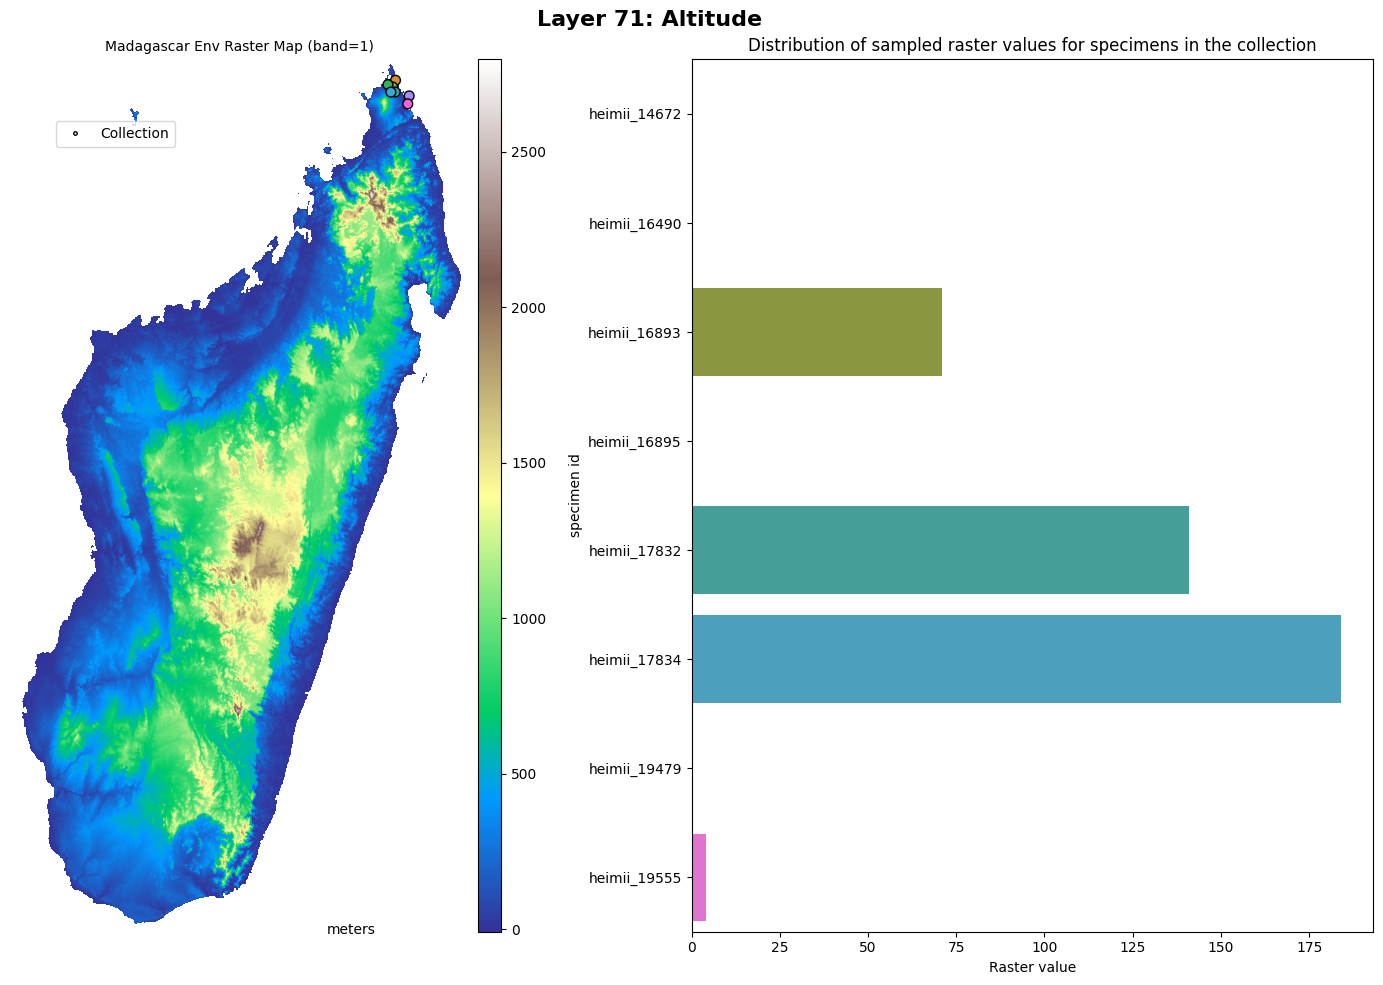

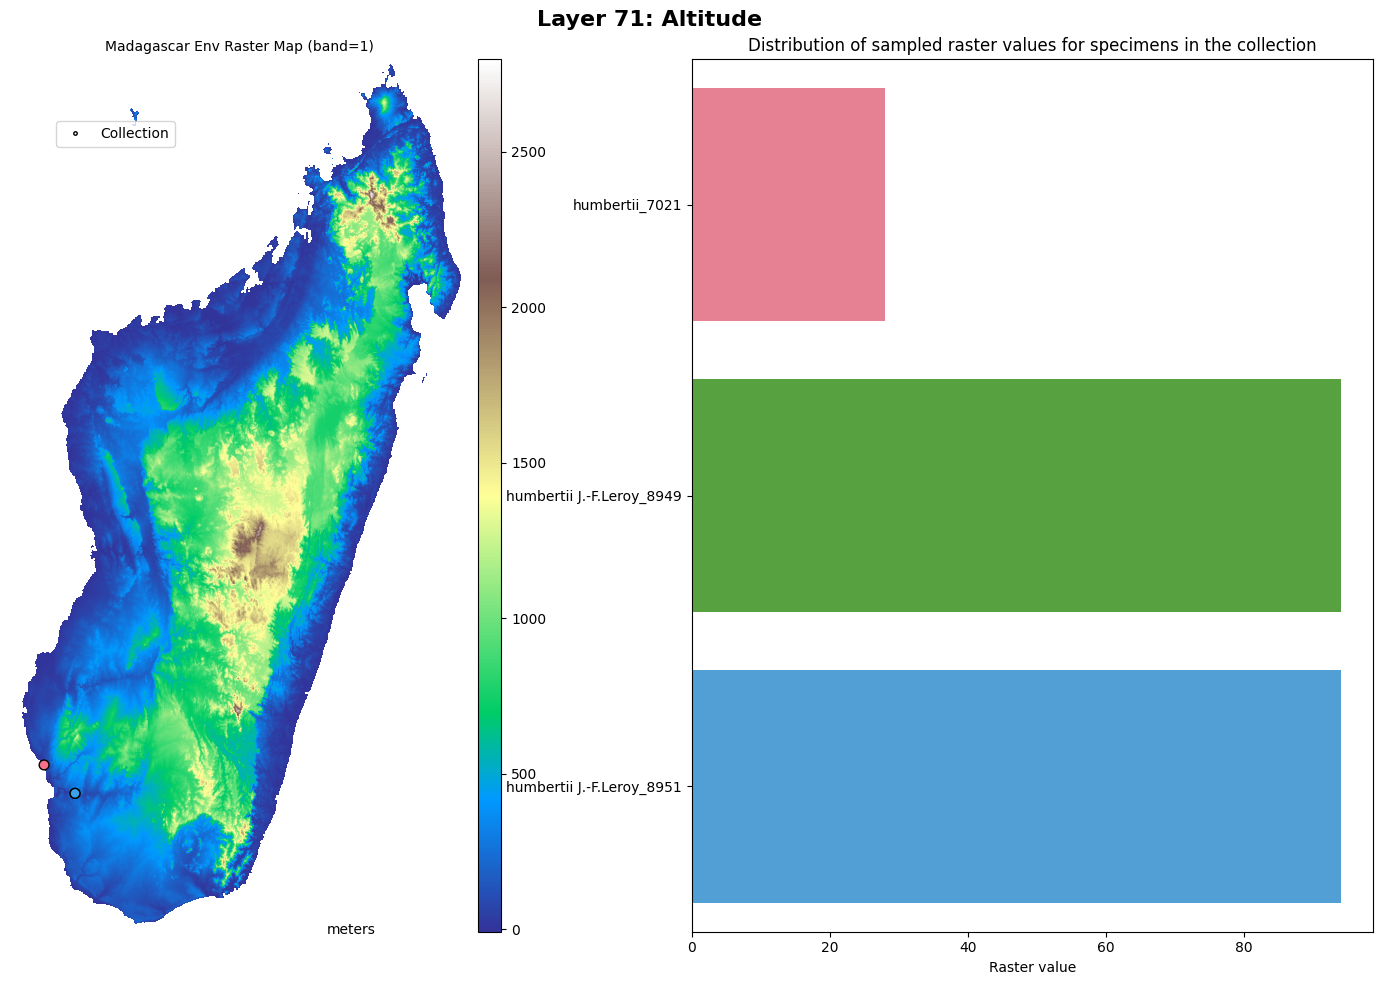

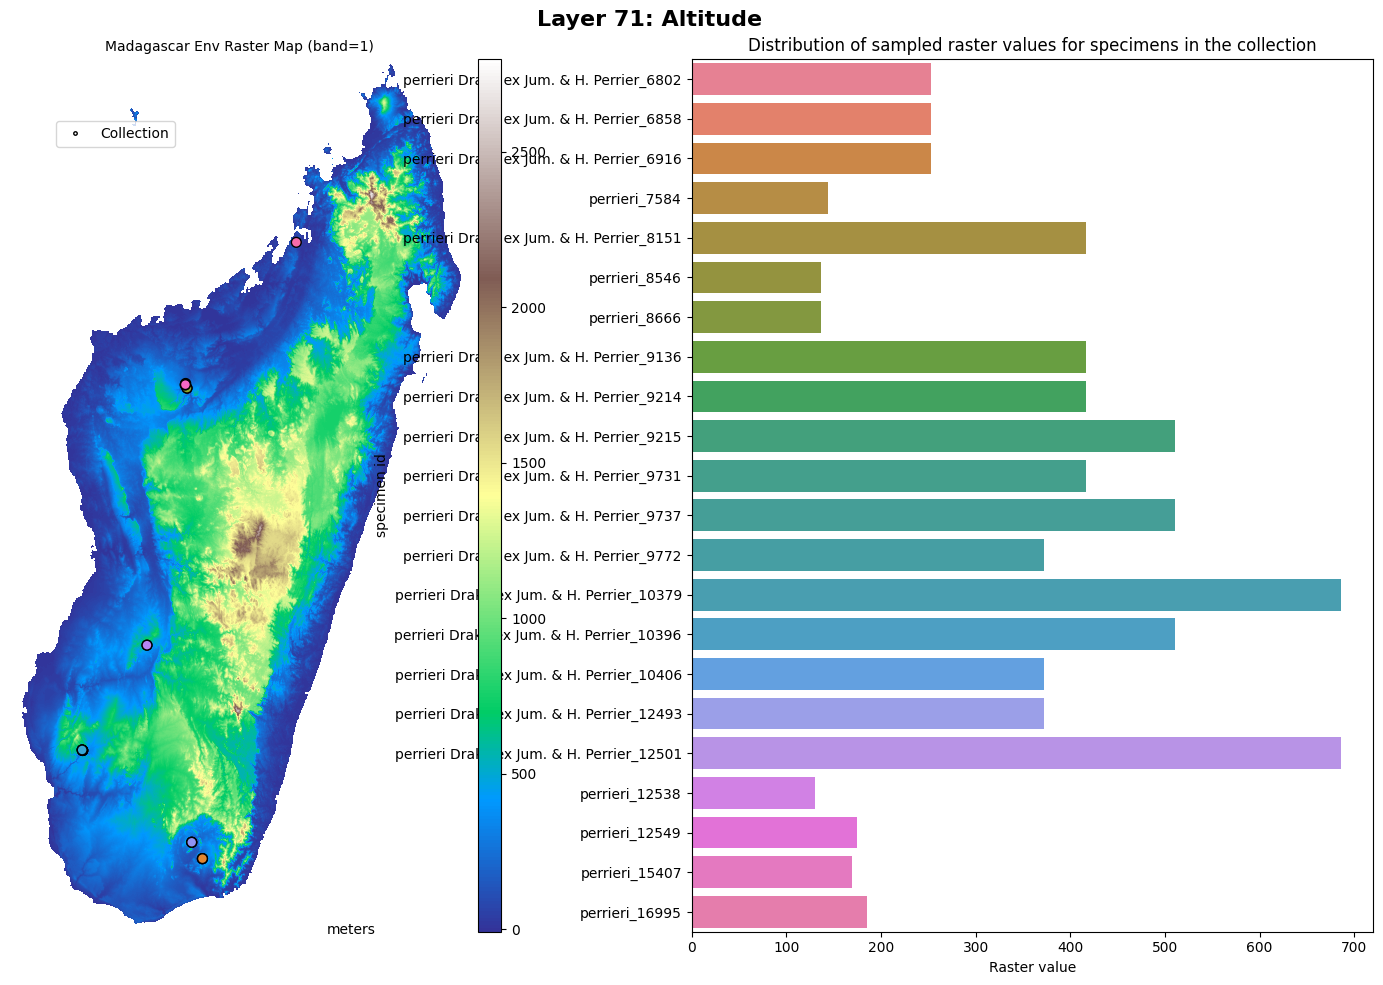

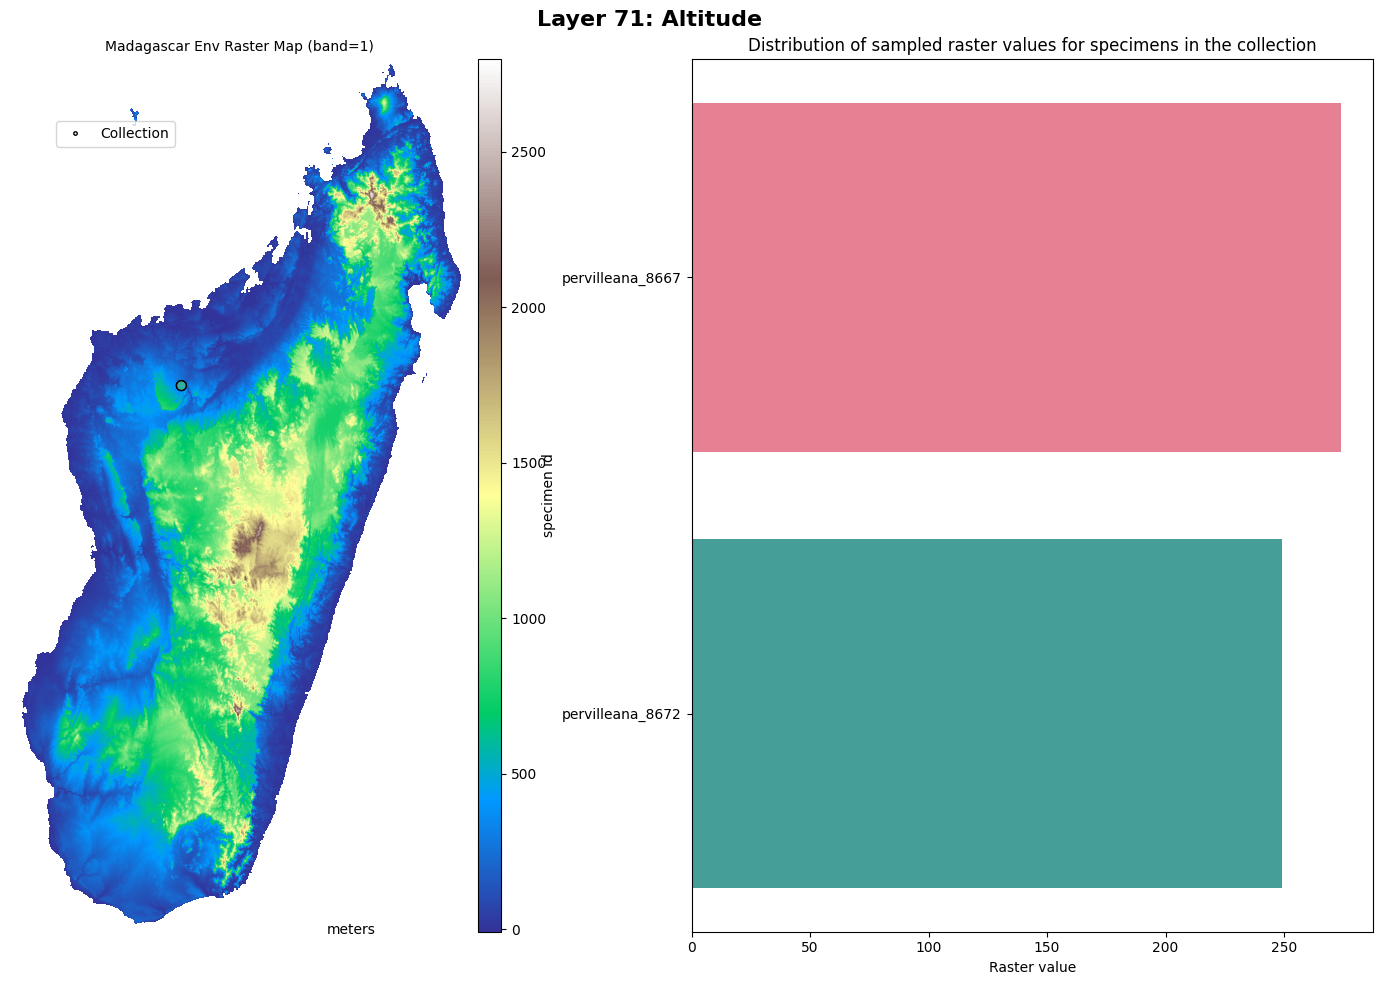

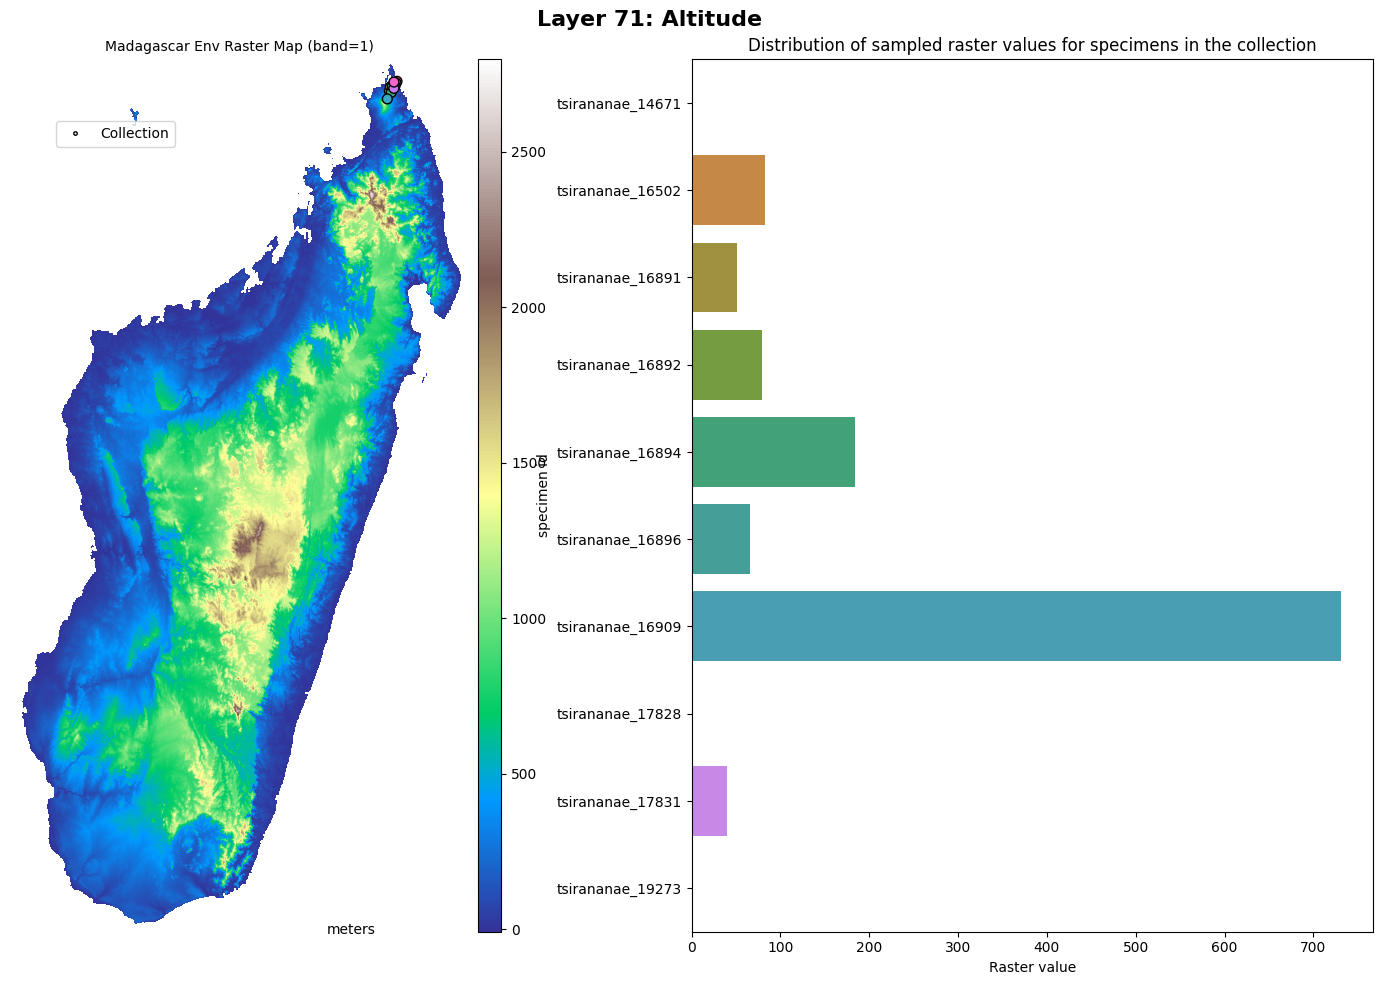

In [61]:
# Base visualization for continuous layers
def view_cont_layers(coll, layer_nb):
    coll_heimii.plot_on_layer(layer=layer_nb, 
        imshow_cmap="terrain", 
        histplot_binwidth=100, histplot_stat="count", 
        subplots_figsize=(15, 10))

view_cont_layers(coll_heimii, "layer_72")

coll_heimii.plot_on_layer(layer="layer_71", 
    imshow_cmap="terrain", 
    histplot_binwidth=100, histplot_stat="count", 
    subplots_figsize=(15, 10))

coll_humbertii.plot_on_layer(layer="layer_71", 
    imshow_cmap="terrain", 
    histplot_binwidth=100, histplot_stat="count", 
    subplots_figsize=(15, 10))

coll_perrieri.plot_on_layer(layer="layer_71", 
    imshow_cmap="terrain", 
    histplot_binwidth=100, histplot_stat="count", 
    subplots_figsize=(15, 10))

coll_pervilleana.plot_on_layer(layer="layer_71", 
    imshow_cmap="terrain", 
    histplot_binwidth=100, histplot_stat="count", 
    subplots_figsize=(15, 10))

coll_tsirananae.plot_on_layer(layer="layer_71", 
    imshow_cmap="terrain", 
    histplot_binwidth=100, histplot_stat="count", 
    subplots_figsize=(15, 10))



c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


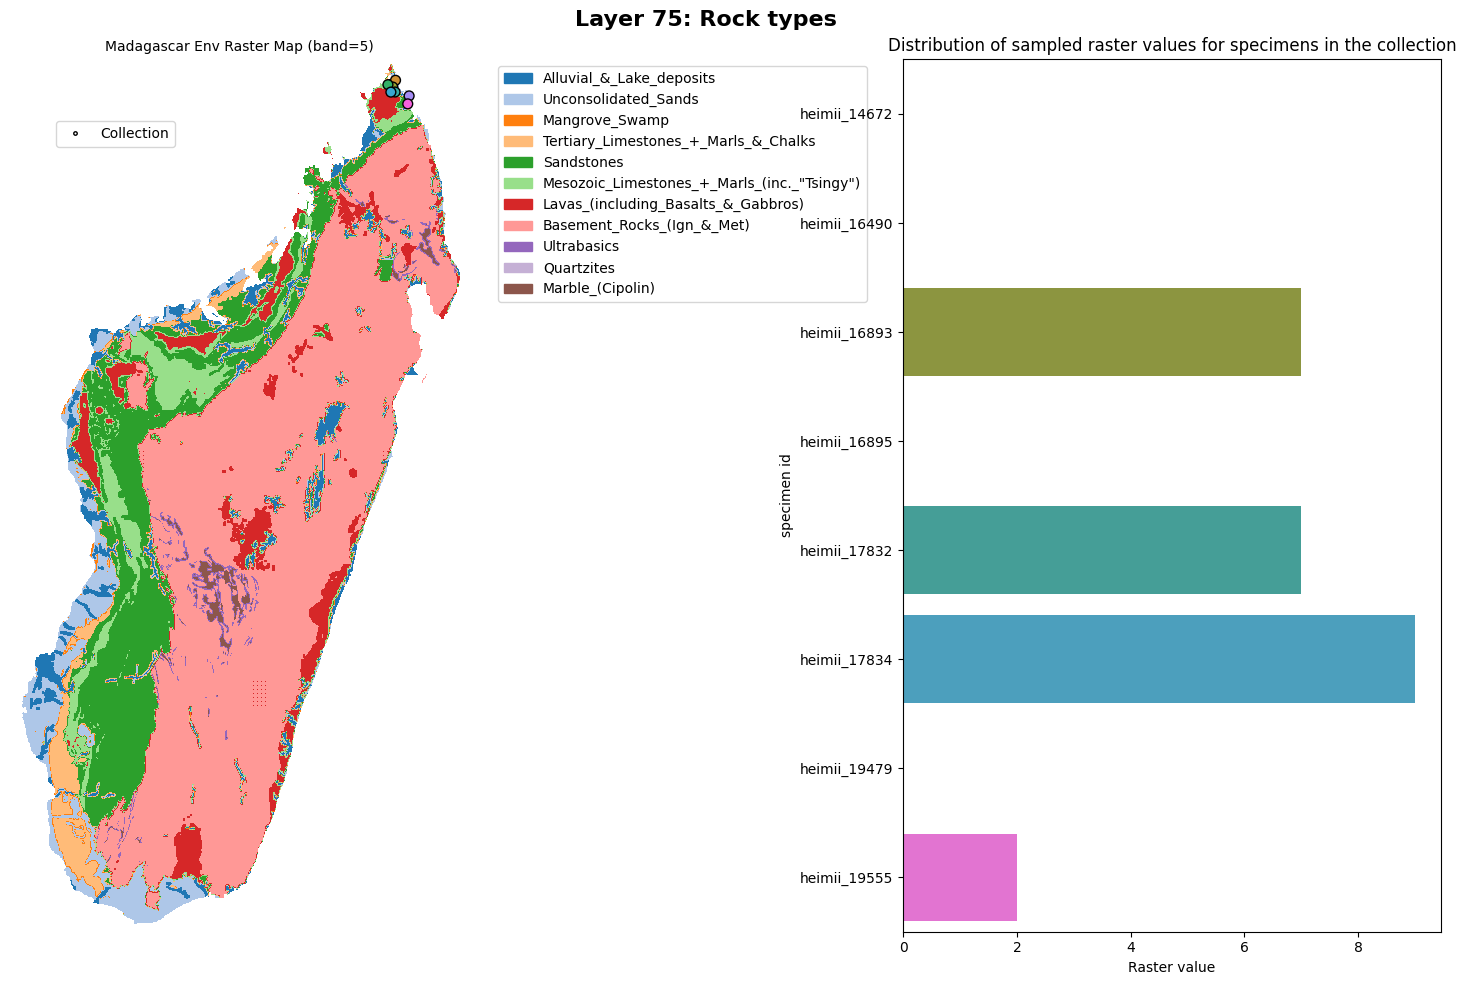

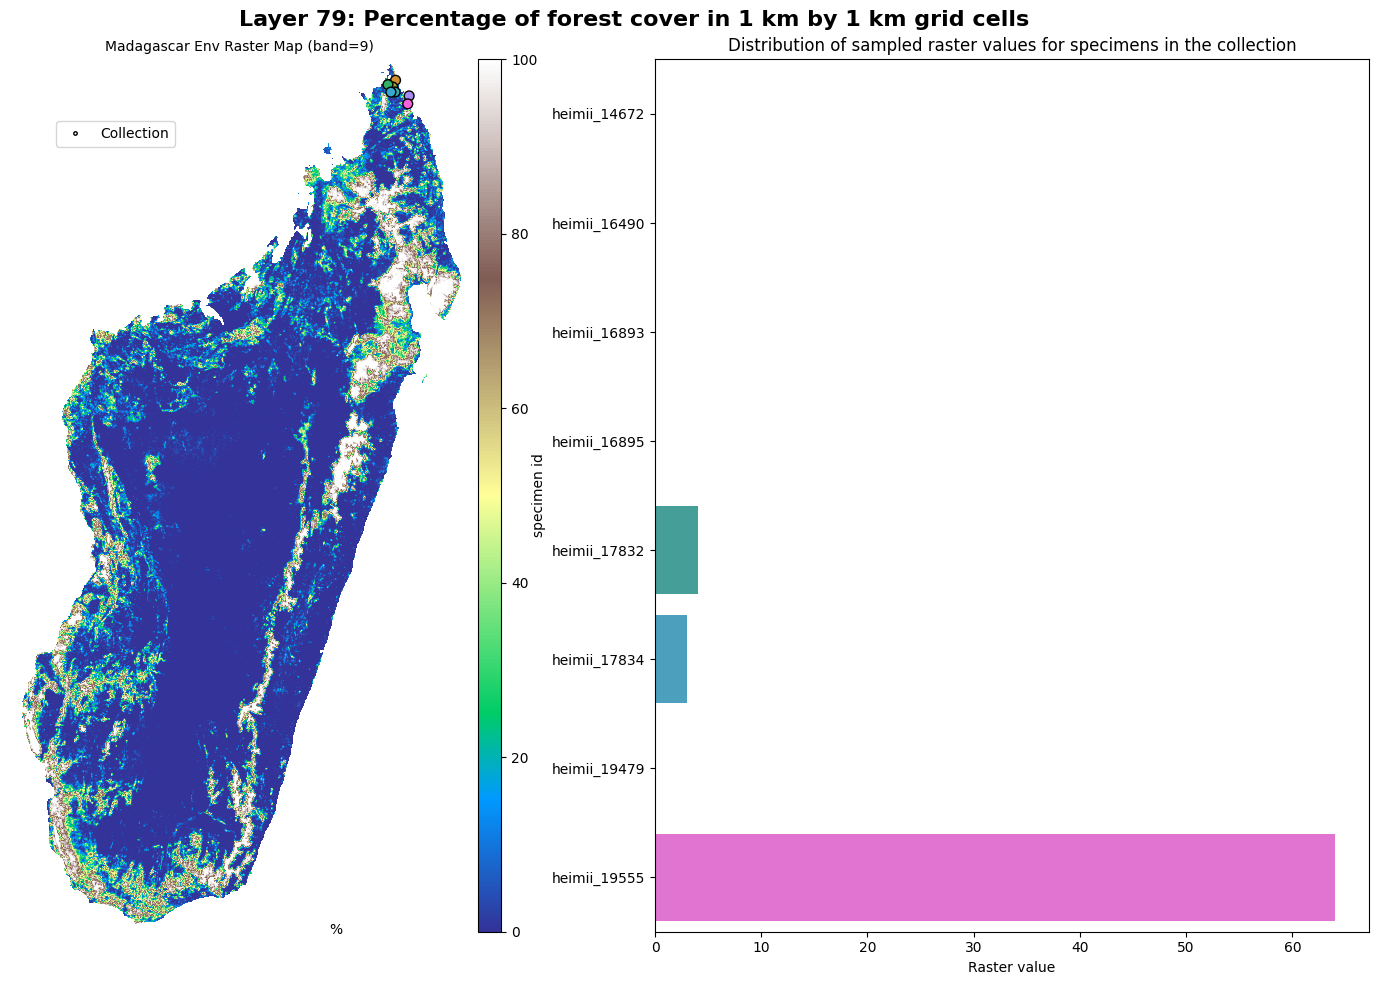

In [67]:
def view_cont_layers(coll, layer_nb):
    coll.plot_on_layer(layer=layer_nb, 
        imshow_cmap="terrain", 
        histplot_binwidth=100, histplot_stat="count", 
        subplots_figsize=(15, 10))

view_cont_layers(coll_heimii, "layer_75")

view_cont_layers(coll_heimii, "layer_79")

c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


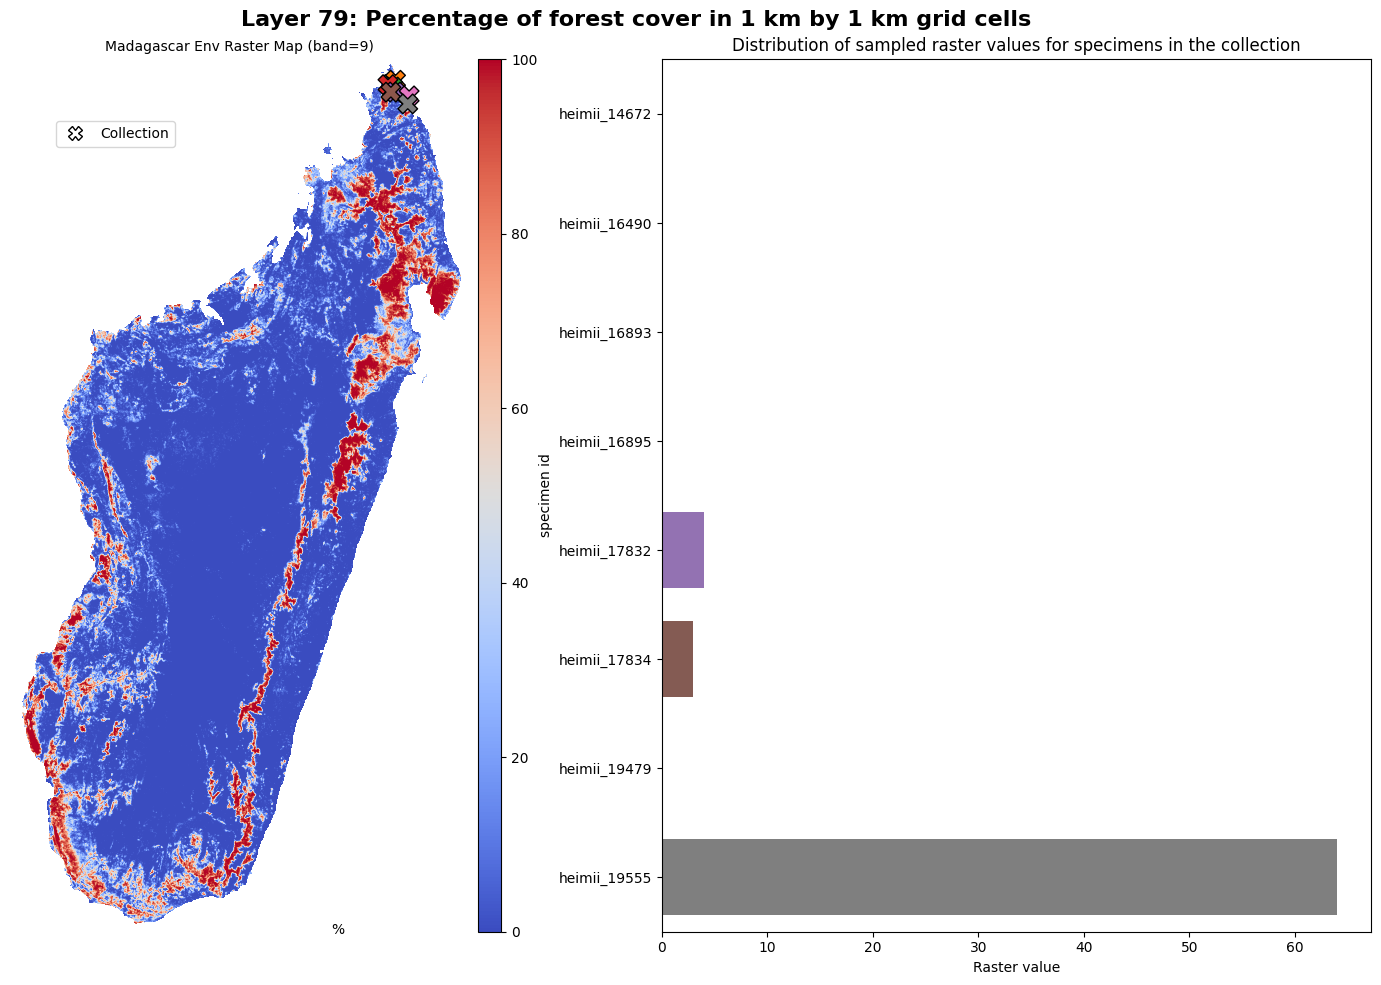

In [68]:
coll_heimii.plot_on_layer(
    layer="layer_79",
    subplots_figsize=(15, 10),
    imshow_cmap="coolwarm",
    rasterpoint_marker="X",
    rasterpoint_markersize=200,
    barplot_palette="tab10",    # Use either barplot_palette or rasterpoint_palette
    barplot_width=0.7,
)

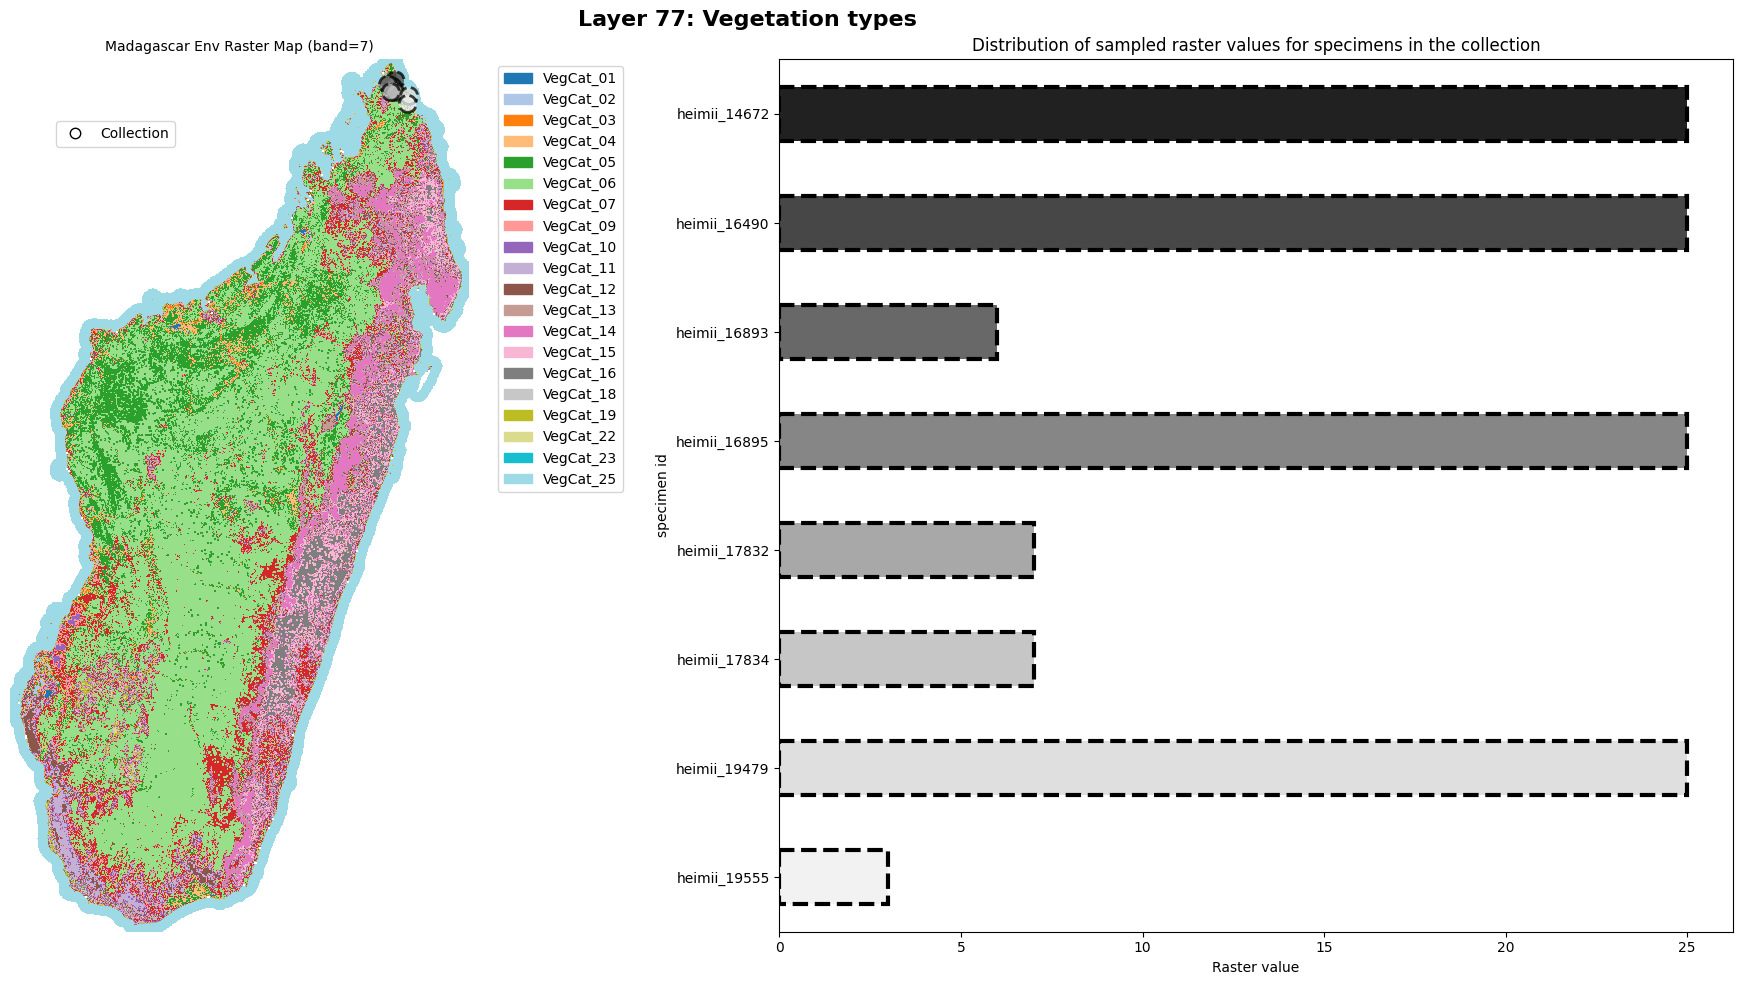

In [69]:
coll_heimii.plot_on_layer(
    layer="layer_77",
    rasterpoint_palette="Greys_r",
    rasterpoint_alpha=0.75,
    rasterpoint_markersize=150,
    rasterpoint_linewidths=2,
    rasterpoint_linestyle="--",
    barplot_linewidth=3,
    barplot_edgecolor="black",
    barplot_linestyle="--",
    barplot_width=0.5,
)

In [ ]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')